In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df=pd.read_csv("exams.csv")

In [3]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86
...,...,...,...,...,...,...,...,...
995,male,group C,some college,standard,none,77,77,71
996,male,group C,some college,standard,none,80,66,66
997,female,group A,high school,standard,completed,67,86,86
998,male,group E,high school,standard,none,80,72,62


In [4]:
df.shape

(1000, 8)

In [5]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

<AxesSubplot:>

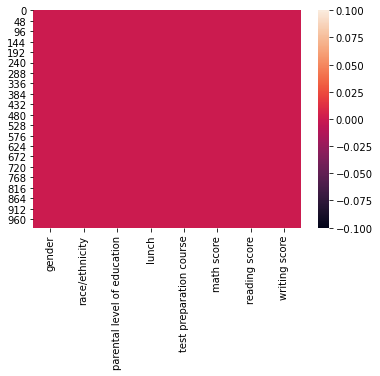

In [8]:
sns.heatmap(df.isna())

In [9]:
df['avarage score']=df[['math score','writing score','writing score']].mean(axis=1)

In [11]:
df['gender'].value_counts()

male      508
female    492
Name: gender, dtype: int64

<AxesSubplot:xlabel='gender', ylabel='count'>

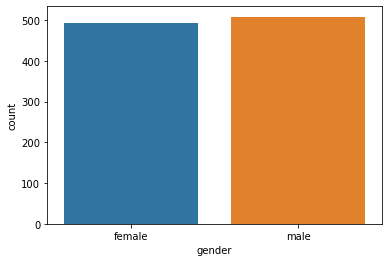

In [12]:
sns.countplot(data=df,x='gender')

In [13]:
df['race/ethnicity'].value_counts()

group C    323
group D    257
group B    198
group E    143
group A     79
Name: race/ethnicity, dtype: int64

<AxesSubplot:xlabel='race/ethnicity', ylabel='count'>

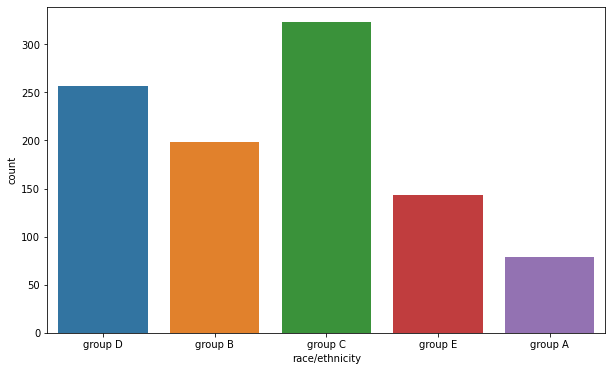

In [16]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='race/ethnicity')

In [17]:
df['parental level of education'].value_counts()

some college          224
high school           215
associate's degree    204
some high school      177
bachelor's degree     105
master's degree        75
Name: parental level of education, dtype: int64

<AxesSubplot:xlabel='parental level of education', ylabel='count'>

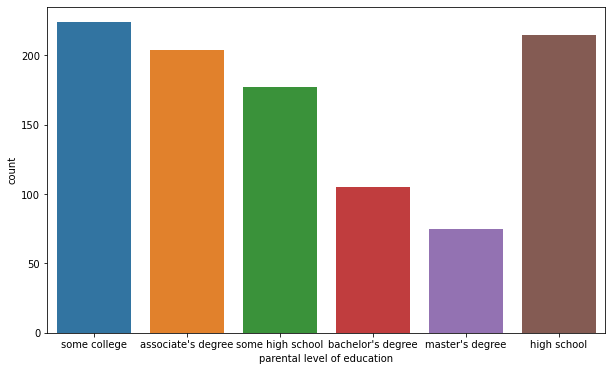

In [19]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='parental level of education')

In [20]:
df['lunch'].value_counts()

standard        660
free/reduced    340
Name: lunch, dtype: int64

<AxesSubplot:xlabel='lunch', ylabel='count'>

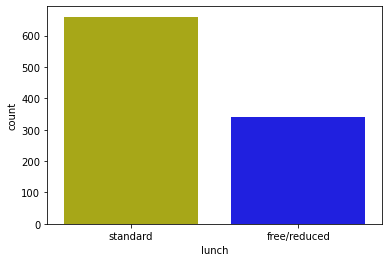

In [32]:
sns.countplot(data=df,x='lunch',palette=['y','b'])

In [23]:
df['test preparation course'].value_counts()

none         656
completed    344
Name: test preparation course, dtype: int64

<AxesSubplot:xlabel='test preparation course', ylabel='count'>

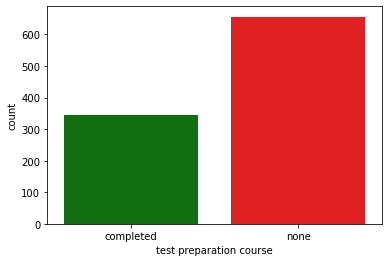

In [28]:
sns.countplot(data=df,x='test preparation course',palette=['g','r'])

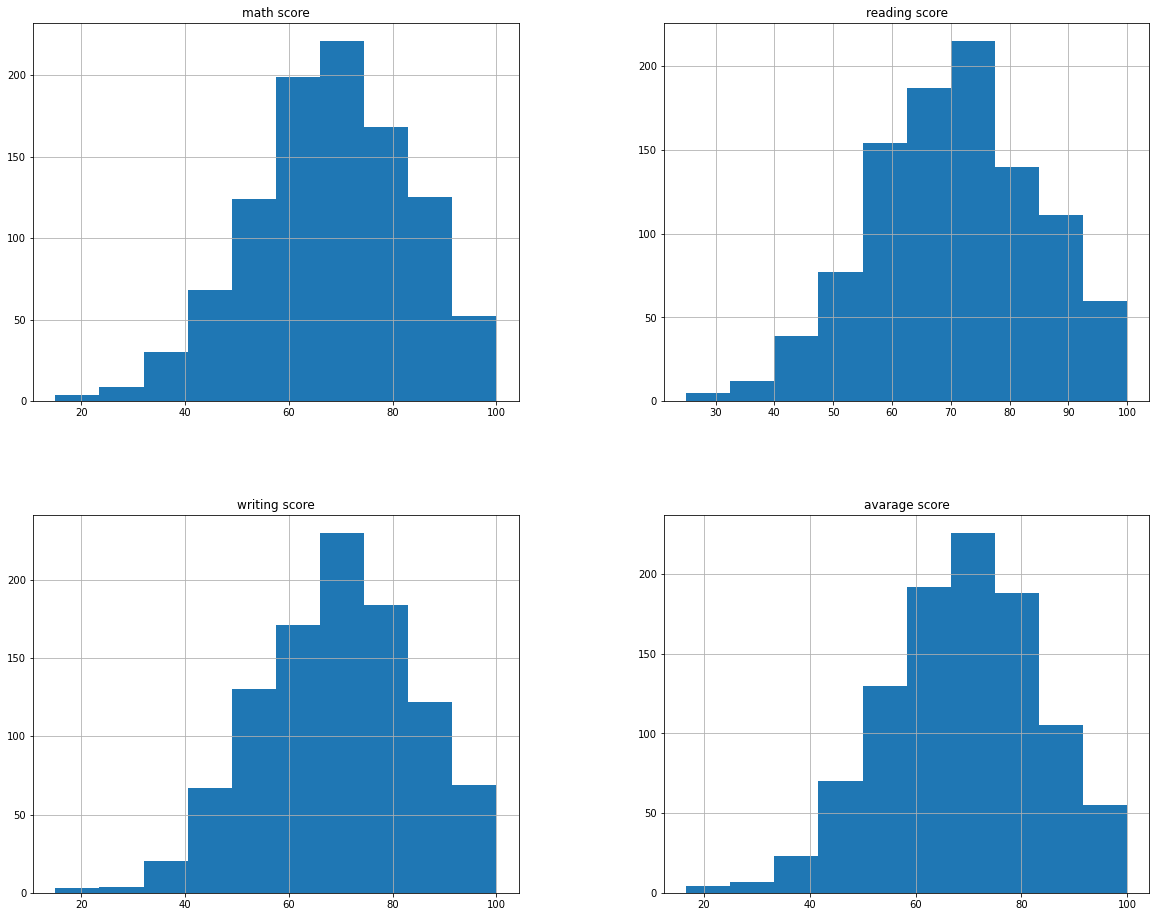

In [33]:
df.hist(figsize=(20,16))
plt.show()

In [36]:
df.drop(['gender','race/ethnicity','parental level of education','lunch','test preparation course'],axis=1,inplace=True)

# MODEL

In [41]:
X=df.drop("avarage score",axis=1)
y=df['avarage score']

In [42]:
X

,math score,reading score,writing score
0,59,70,78
1,96,93,87
2,57,76,77
3,70,70,63
4,83,85,86
...,...,...,...
995,77,77,71
996,80,66,66
997,67,86,86
998,80,72,62


In [43]:
y

0      71.666667
1      90.000000
2      70.333333
3      65.333333
4      85.000000
         ...    
995    73.000000
996    70.666667
997    79.666667
998    68.000000
999    49.333333
Name: avarage score, Length: 1000, dtype: float64

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [46]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((670, 3), (330, 3), (670,), (330,))

In [47]:
from sklearn.linear_model import LinearRegression

In [48]:
model=LinearRegression()

In [49]:
model.fit(X_train,y_train)

LinearRegression()

In [51]:
pre=model.predict(X_test)
pre

array([69.        , 79.33333333, 51.66666667, 67.33333333, 82.        ,
       51.        , 72.66666667, 28.        , 81.33333333, 87.        ,
       54.        , 87.33333333, 96.33333333, 72.        , 58.33333333,
       97.33333333, 75.        , 70.33333333, 79.33333333, 48.33333333,
       78.        , 62.33333333, 60.        , 89.        , 60.33333333,
       80.66666667, 55.        , 81.33333333, 68.33333333, 75.        ,
       54.66666667, 74.66666667, 85.66666667, 62.66666667, 51.33333333,
       95.66666667, 64.        , 66.33333333, 78.66666667, 66.33333333,
       61.        , 80.66666667, 92.66666667, 92.66666667, 70.33333333,
       79.        , 57.        , 55.66666667, 64.        , 49.66666667,
       70.33333333, 59.        , 61.66666667, 72.66666667, 87.        ,
       83.33333333, 47.        , 70.66666667, 65.        , 67.66666667,
       42.33333333, 65.        , 64.        , 56.66666667, 58.66666667,
       72.33333333, 80.66666667, 88.        , 79.66666667, 76.66

In [52]:
y_test.values

array([69.        , 79.33333333, 51.66666667, 67.33333333, 82.        ,
       51.        , 72.66666667, 28.        , 81.33333333, 87.        ,
       54.        , 87.33333333, 96.33333333, 72.        , 58.33333333,
       97.33333333, 75.        , 70.33333333, 79.33333333, 48.33333333,
       78.        , 62.33333333, 60.        , 89.        , 60.33333333,
       80.66666667, 55.        , 81.33333333, 68.33333333, 75.        ,
       54.66666667, 74.66666667, 85.66666667, 62.66666667, 51.33333333,
       95.66666667, 64.        , 66.33333333, 78.66666667, 66.33333333,
       61.        , 80.66666667, 92.66666667, 92.66666667, 70.33333333,
       79.        , 57.        , 55.66666667, 64.        , 49.66666667,
       70.33333333, 59.        , 61.66666667, 72.66666667, 87.        ,
       83.33333333, 47.        , 70.66666667, 65.        , 67.66666667,
       42.33333333, 65.        , 64.        , 56.66666667, 58.66666667,
       72.33333333, 80.66666667, 88.        , 79.66666667, 76.66

In [61]:
from sklearn.metrics import rand_score

In [62]:
 rand_score(pre,y_test)

C:\Users\amr\anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


0.9962236345215069